# **LAB 2 - PART 2 SVR**

In [907]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import metrics
import pandas_datareader.data as web
import yfinance as yf

### **Retrieve the Financial Data**
Historical stock prices for a set of stocks, foreign exchange rates, and key market indices.

Ticker:
- stock tickers : `stk_tickers = ['MSFT', 'IBM', 'GOOGL']`
- foreign exchange tickers : `ccy_tickers = ['DEXJPUS', 'DEXUSUK']`
- market index tickers : `idx_tickers = ['SP500', 'DJIA', 'VIXCLS']`

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `yf.download()`
- `web.DataReader()`
</details>

In [908]:
### START CODE HERE ###
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

stk_data = yf.download(stk_tickers,start='2018-12-31', end='2024-1-12')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')
### END CODE HERE ###

[*********************100%%**********************]  3 of 3 completed


### **Exploring the Data**

In [909]:
stk_data

Adj Close                               Close              \
                 GOOGL         IBM        MSFT       GOOGL         IBM   
Date                                                                     
2018-12-31   52.248001   85.148727   96.450577   52.248001  108.671127   
2019-01-02   52.734001   86.302307   96.023277   52.734001  110.143402   
2019-01-03   51.273499   84.579414   92.490768   51.273499  107.944550   
2019-01-04   53.903500   87.882904   96.792412   53.903500  112.160614   
2019-01-07   53.796001   88.504623   96.915886   53.796001  112.954109   
...                ...         ...         ...         ...         ...   
2024-01-05  135.729996  159.160004  367.750000  135.729996  159.160004   
2024-01-08  138.839996  161.139999  374.690002  138.839996  161.139999   
2024-01-09  140.949997  160.080002  375.790009  140.949997  160.080002   
2024-01-10  142.279999  161.229996  382.769989  142.279999  161.229996   
2024-01-11  142.080002  162.160004  384.630005  142.080002  162.160004   

                              High                                 Low  \
                  MSFT       GOOGL         IBM        MSFT       GOOGL   
Date                                                                     
2018-12-31  101.570000   53.149502  109.321220  102.400002   51.652000   
2019-01-02  101.120003   53.039501  110.879539  101.750000   51.264000   
2019-01-03   97.400002   53.313000  109.827919  100.190002   51.118500   
2019-01-04  101.930000   54.000000  112.323135  102.510002   51.842999   
2019-01-07  102.059998   54.134998  113.604210  103.269997   53.132000   
...                ...         ...         ...         ...         ...   
2024-01-05  367.750000  137.160004  160.550003  372.059998  135.149994   
2024-01-08  374.690002  139.009995  161.220001  375.200012  136.259995   
2024-01-09  375.790009  141.490005  160.479996  375.989990  138.149994   
2024-01-10  382.769989  143.000000  161.339996  384.170013  140.910004   
2024-01-11  384.630005  145.220001  162.229996  390.679993  140.639999   

                                          Open                          \
                   IBM        MSFT       GOOGL         IBM        MSFT   
Date                                                                     
2018-12-31  107.476097  100.440002   52.891499  108.346077  101.290001   
2019-01-02  106.778206   98.940002   51.360001  107.084129   99.550003   
2019-01-03  107.734222   97.199997   52.533501  109.493309  100.099998   
2019-01-04  109.407265   98.930000   52.127998  109.856598   99.720001   
2019-01-07  111.539200  100.980003   54.048500  112.332695  101.639999   
...                ...         ...         ...         ...         ...   
2024-01-05  158.669998  366.500000  136.750000  159.910004  368.970001   
2024-01-08  157.889999  369.010010  136.289993  158.690002  369.299988   
2024-01-09  159.509995  371.190002  138.500000  160.000000  372.010010   
2024-01-10  159.740005  376.320007  141.000000  160.279999  376.369995   
2024-01-11  160.289993  380.380005  143.490005  161.020004  386.000000   

              Volume                     
               GOOGL      IBM      MSFT  
Date                                     
2018-12-31  33110000  5212009  33173800  
2019-01-02  31868000  4434935  35329300  
2019-01-03  41960000  4546648  42579100  
2019-01-04  46022000  4683779  44060600  
2019-01-07  47446000  3923755  35656100  
...              ...      ...       ...  
2024-01-05  22506000  4199400  20987000  
2024-01-08  21404000  3321700  23134000  
2024-01-09  24759600  2617200  20830000  
2024-01-10  21320200  2967800  25514200  
2024-01-11  24008700  3778200  27850800  

[1267 rows x 18 columns]

In [910]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2019-01-14,NaN,NaN
2019-01-15,108.72,1.2761
2019-01-16,108.84,1.2862
2019-01-17,109.01,1.2940
2019-01-18,109.79,1.2898
...,...,...
2024-01-01,NaN,NaN
2024-01-02,141.89,1.2632
2024-01-03,143.55,1.2641


In [911]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2019-01-14,2582.61,23909.84,19.07
2019-01-15,2610.30,24065.59,18.60
2019-01-16,2616.10,24207.16,19.04
2019-01-17,2635.96,24370.10,18.06
2019-01-18,2670.71,24706.35,17.80
...,...,...,...
2024-01-08,4763.54,37683.01,13.08
2024-01-09,4756.50,37525.16,12.76
2024-01-10,4783.45,37695.73,12.69


Let's 
- `base` be stk_data's `'Adj Close'` and `'MSFT'`<br>
- `X1` be `stk_data`'s `'Adj Close'` and `('GOOGL','IBM')`<br>
- `X2` be `ccy_data`<br>
- `X3` be `idx_data`


In [912]:
base = stk_data['Adj Close']['MSFT']
X1 = stk_data['Adj Close'][['GOOGL', 'IBM']]
X2 = ccy_data
X3 = idx_data


Create lagged and differenced features for time series analysis<br>
- `Y` : difference price of `'Adj Close', 'MSFT'` for past `n` days.
- `X4_[k]DT` : difference price of `'Adj Close', 'MSFT'` for past or next `[k]*n` days. Please select 3 values for `k`.
Concatenate the resulting features `X4_[k[0]]DT`, `X4_[k[1]]DT`, `X4_[k[2]]DT` into a single feature set `X4`. Finally, standardize the values in `X4`.<br>
(See detail explanation in lab direction)


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.diff()`
- `.shift()`
</details>

In [913]:
### START CODE HERE ###
return_period = 3 # daily return
k1 = 3
k2 = 6
k3 = 12
k = [k1, k2, k3]

Y = base.shift(-return_period)

### Choose calculation of difference price either past (Guide#1) or next (Guide#2) 

### Guide#1 for using price of past [k]*n days
X4_3DT = pd.DataFrame({'MSFT_3DT':base.diff(k[0]*return_period)})
X4_6DT = pd.DataFrame({'MSFT_6DT':base.diff(k[1]*return_period)})
X4_12DT = pd.DataFrame({'MSFT_12DT':base.diff(k[2]*return_period)})

# ### Guide#2 for using price of next [k]*n days
# X4_3DT = pd.DataFrame({'MSFT_3DT':base.diff(k[0]*return_period).shift(-k[0]*return_period)})
# X4_6DT = pd.DataFrame({'MSFT_6DT':base.diff(k[1]*return_period).shift(-k[1]*return_period)})
# X4_12DT = pd.DataFrame({'MSFT_12DT':base.diff(k[2]*return_period).shift(-k[2]*return_period)})


X4 = pd.concat([X4_3DT,X4_6DT,X4_12DT],axis=1)
### END CODE HERE ###

**Standardize `X1-4`**

***NOTE:*** Please ensure that each of ***X1-4's index columns*** is the ***date column***.

In [914]:
### START CODE HERE ###
standard_scaler = preprocessing.StandardScaler()
X1.loc[:, X1.columns] = standard_scaler.fit_transform(X1.loc[:, X1.columns])
X2.loc[:, X2.columns] = standard_scaler.fit_transform(X2.loc[:, X2.columns])
X3.loc[:, X3.columns] = standard_scaler.fit_transform(X3.loc[:, X3.columns])
X4.loc[:, X4.columns] = standard_scaler.fit_transform(X4.loc[:, X4.columns])
### END CODE HERE ###

Concatenate `X1-4` to `X` by index. Then concatenate `X` and `Y` to `dataset` by index.

***NOTE:*** Please ensure that each of ***X1-3's index columns*** is the ***date column***.

In [915]:
### START CODE HERE ###

X = pd.concat([X1,X2,X3,X4],axis=1)
dataset = pd.concat([X,Y],axis=1)

### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

| Date       | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|------------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| 2018-12-31 | -1.545378          | -1.993072         | -0.652377 | -0.107177 | -1.966763| -1.936393| 0.492393 | 0.455826 | 3.333092 | 9.376259  | 96.792442         |
| 2019-01-01 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2019-01-02 | -1.529007          | -1.918422         | -0.684528 | -0.3554   | -1.961748| -1.931557| 0.224562 | 3.693924 | 1.728264 | 10.394836 | 96.915886         |
| 2019-01-03 | -1.578206          | -2.029912         | -0.761557 | -0.302747 | -2.05974 | -2.10151 | 0.496045 | 7.577789 | 8.52739  | 14.661652 | 97.618576         |
| 2019-01-04 | -1.48961           | -1.816142         | -0.746821 | -0.141777 | -1.927197| -1.909175| 0.000558 | 3.978821 | 2.373985 | 10.178764 | 99.014511         |
| ...        | ...                | ...               | ...       | ...       | ...      | ...      | ...      | ...      | ...      | ...       | ...               |
| 2023-12-22 | 1.46086            | 2.989076          | 1.551328  | -0.171865 | 1.577892 | 1.683629 | -1.015981| NaN      | NaN      | NaN       | 375.279999        |
| 2023-12-25 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2023-12-26 | 1.46187            | 3.058317          | NaN       | NaN       | 1.60962  | 1.724664 | -1.020851| NaN      | NaN      | NaN       | NaN               |
| 2023-12-27 | 1.42313            | 3.074495          | NaN       | NaN       | 1.620391 | 1.753295 | -1.089026| NaN      | NaN      | NaN       | NaN               |
| 2023-12-28 | 1.418414           | 3.09326           | NaN       | NaN       | 1.623182 | 1.767092 | NaN      | NaN      | NaN      | NaN       | NaN               |

</details>

In [916]:
dataset

,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT
2018-12-31,-1.550217,-1.962378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.792412
2019-01-02,-1.533898,-1.889637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.915886
2019-01-03,-1.582939,-1.998278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.618591
2019-01-04,-1.494629,-1.789968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.014488
2019-01-07,-1.498238,-1.750764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.378250
...,...,...,...,...,...,...,...,...,...,...,...
2024-01-08,1.357379,2.829448,NaN,NaN,1.572189,1.735356,-0.998364,-0.168873,-0.037482,-0.138050,384.630005
2024-01-09,1.428229,2.762607,NaN,NaN,1.561043,1.694652,-1.037193,-0.077109,-0.166046,-0.092146,NaN
2024-01-10,1.472888,2.835123,NaN,NaN,1.603713,1.738636,-1.045686,0.603926,0.287822,-0.068953,NaN
2024-01-11,1.466173,2.893767,NaN,NaN,1.598631,1.742579,-1.076021,0.662406,0.956615,0.326314,NaN


**Drop NA**

Drop NA from `dataset`.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
DatetimeIndex: 1207 entries, 2018-12-31 to 2023-11-06
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  1207 non-null   float64
 1   (Adj Close, IBM)    1207 non-null   float64
 2   DEXJPUS             1207 non-null   float64
 3   DEXUSUK             1207 non-null   float64
 4   SP500               1207 non-null   float64
 5   DJIA                1207 non-null   float64
 6   VIXCLS              1207 non-null   float64
 7   MSFT_3DT            1207 non-null   float64
 8   MSFT_6DT            1207 non-null   float64
 9   MSFT_12DT           1207 non-null   float64
 10  (Adj Close, MSFT)   1207 non-null   float64
dtypes: float64(11)
memory usage: 113.2 KB
```
<br>

| Statistic | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|-----------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| count     | 1207.000000        | 1207.000000       | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 |
| mean      | -0.035934          | -0.076293         | -0.048627 | 0.010266  | -0.038274| -0.038135| 0.032071 | 2.003695 | 4.026331 | 8.035808  | 228.156289        |
| std       | 0.990693           | 0.898243          | 0.967200  | 1.011495 | 0.987860 | 0.988187 | 1.006162 | 11.217826 | 15.534667 | 20.737484 | 70.323041         |
| min       | -1.578206          | -2.638620         | -1.133307 | -3.206211 | -2.391674 | -3.155777 | -1.197376 | -33.900146 | -52.498260 | -60.695969 | 96.792442         |
| 25%       | -0.995937          | -0.771499         | -0.759213 | -0.719462 | -1.006790 | -0.968910 | -0.631888 | -3.104721 | -4.466766 | -1.814156 | 165.381950        |
| 50%       | 0.007967           | -0.093102         | -0.598791 | 0.029723  | 0.217450  | 0.238699  | -0.194228 | 2.514923 | 4.754410 | 9.164612  | 238.217758        |
| 75%       | 0.814595           | 0.512558          | 0.890217  | 0.725501  | 0.808928  | 0.821986  | 0.480219  | 8.710037 | 13.093704 | 20.562767 | 284.131805        |
| max       | 1.742090           | 2.083764          | 2.144788  | 2.036573  | 1.644014  | 1.532654  | 7.464517  | 35.238464 | 48.708038 | 72.977844 | 362.464325        |



</details>

In [917]:
### START CODE HERE ###
dataset = dataset.dropna()
### END CODE HERE ###
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1213 entries, 2019-02-22 to 2024-01-05
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   GOOGL      1213 non-null   float64
 1   IBM        1213 non-null   float64
 2   DEXJPUS    1213 non-null   float64
 3   DEXUSUK    1213 non-null   float64
 4   SP500      1213 non-null   float64
 5   DJIA       1213 non-null   float64
 6   VIXCLS     1213 non-null   float64
 7   MSFT_3DT   1213 non-null   float64
 8   MSFT_6DT   1213 non-null   float64
 9   MSFT_12DT  1213 non-null   float64
 10  MSFT       1213 non-null   float64
dtypes: float64(11)
memory usage: 113.7 KB


,GOOGL,IBM,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT,MSFT
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.036586,0.027586,0.014055,-0.005322,0.029169,0.025289,0.018011,-0.007983,-0.000601,0.000612,236.524604
std,0.980917,0.978513,1.007324,1.010644,0.976753,0.982704,1.013422,1.011361,1.009457,1.000683,71.348570
min,-1.560660,-2.591440,-1.141537,-3.204850,-2.427512,-3.187529,-1.185227,-3.228608,-3.666375,-3.320765,105.273705
25%,-0.899104,-0.719475,-0.768731,-0.732641,-0.894901,-0.895616,-0.648907,-0.491066,-0.555634,-0.475636,177.562134
50%,0.099879,-0.000682,-0.565020,-0.084514,0.252551,0.340260,-0.203592,0.045260,0.048371,0.061757,242.216507
75%,0.924591,0.570136,0.984785,0.712488,0.880229,0.836396,0.456494,0.604319,0.591275,0.606379,290.242615
max,1.726689,3.054564,2.123172,2.035811,1.624471,1.743615,7.448062,2.991470,2.905072,3.138492,382.769989


Let's `Y` be `dataset`'s `Y` column and X be all `dataset`'s columns except `Y`.

In [918]:
### START CODE HERE ###
Y = dataset.iloc[:,-1]
X = dataset.iloc[:,:-1]

Y_standardized = (Y-Y.mean())/Y.std()
X_standardized = (X-X.mean())/X.std()
### END CODE HERE ###

**Calculate the Correlation**

1. Drop columns that have correlation more than 0.9.
2. Show Dropped Columns

In [919]:
### START CODE HERE ###
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Find columns with correlation greater than 0.9
dropped_columns = []
for column in correlation_matrix.columns:
    correlated_columns = correlation_matrix[column][correlation_matrix[column] > 0.9].index.tolist()
    for correlated_column in correlated_columns:
        if correlated_column != column and correlated_column not in dropped_columns:
            dropped_columns.append(correlated_column)

# Drop the correlated columns
X_standardized_dropped = X_standardized.drop(dropped_columns, axis=1)
X_standardized = X_standardized_dropped
# Show the dropped columns
print("Dropped Columns:", dropped_columns)

### END CODE HERE ###

Dropped Columns: ['SP500', 'DJIA', 'GOOGL']


In [920]:
X_standardized

,IBM,DEXJPUS,DEXUSUK,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2019-02-22,-0.720524,-0.606588,0.351656,-0.951429,0.318861,0.134123,0.064544
2019-02-25,-0.710266,-0.582135,0.339753,-0.790988,0.406933,0.302869,0.113728
2019-02-26,-0.697570,-0.602622,0.626925,-0.752673,0.333722,0.139982,0.319765
2019-02-27,-0.724431,-0.592048,0.725129,-0.808948,0.324363,0.247435,0.103297
2019-02-28,-0.775219,-0.561648,0.659660,-0.808948,0.304884,0.339631,0.090888
...,...,...,...,...,...,...,...
2023-12-29,3.018692,1.390603,-0.130436,-1.078345,0.303480,0.189237,0.395993
2024-01-02,2.886585,1.454708,-0.295597,-0.988546,-0.327208,-0.360723,0.017676
2024-01-03,2.796367,1.564415,-0.282205,-0.887971,-0.405489,-0.138809,0.125596
2024-01-04,2.845342,1.633147,-0.206321,-0.877195,-0.407267,-0.448204,-0.435599


### **Train/Test Model**

**Train/Test Split**

Split the dataset into training and testing sets. Reserve frist 70% of data for training and last 30% for testing.


In [921]:
### START CODE HERE ###
test_size = 0.3
train_size = 0.7
X_train, X_test = X_standardized[:int(
    len(X)*train_size)], X_standardized[int(len(X)*train_size):]
Y_train, Y_test = Y_standardized[:int(
    len(Y)*train_size)], Y_standardized[int(len(Y)*train_size):]
### START CODE HERE ###

**Initialize models**
- `Linear Regression`
- `Support Vector Regression` which `kernels` are `['linear','rbf','poly']` and `C` value are `[0.1, 1, 10, 100]`
- `Linear Regression` with `Gradient Descent` from `Lab2-2`


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `LinearRegression()`
- `SVR()`
</details>

In [922]:
a = np.zeros(7)
a = np.add(a,np.random.rand(7))
a

array([0.6374071 , 0.70059551, 0.32230139, 0.99356023, 0.27797267,
       0.95751651, 0.65120083])

In [923]:
### START CODE HERE ###

linear_model = LinearRegression()

c_value = [0.1, 1, 10, 100]

svr_linear_1 = SVR(kernel='linear', C=0.1)
svr_linear_2 = SVR(kernel='linear', C=1)
svr_linear_3 = SVR(kernel='linear', C=10)
svr_linear_4 = SVR(kernel='linear', C=100)

svr_rbf_1 = SVR(kernel='rbf', C=0.1, gamma=0.01)
svr_rbf_2 = SVR(kernel='rbf', C=1, gamma=0.01)
svr_rbf_3 = SVR(kernel='rbf', C=10, gamma=0.01)
svr_rbf_4 = SVR(kernel='rbf', C=100, gamma=0.01)

svr_poly_1 = SVR(kernel='poly', C=0.1, degree=2)
svr_poly_2 = SVR(kernel='poly', C=1, degree=2)
svr_poly_3 = SVR(kernel='poly', C=10, degree=2)
svr_poly_4 = SVR(kernel='poly', C=100, degree=2)

num_samples, num_features = X_train.shape

def linear_gradient_descent(x, y, learning_rate=0.01, num_iterations=100):
    num_samples, num_features = x.shape
    theta = np.zeros(num_features)
    theta = np.add(theta, np.random.rand(num_features))
    for i in range(num_iterations):
        y_pred = np.dot(x, theta)
        loss = y_pred - y
        gradient = np.dot(x.T, loss) / num_samples
        theta = theta - learning_rate * gradient
        print("Iteration %d | theta: %s | loss: %s" % (i, str(theta), str(np.sum(loss ** 2) / num_samples)))
    return theta

### END CODE HERE ###

**Train models**

Train all models with at least two X's columns.

<span style='color: orange;'>**BONUS POINTS**</span> for those who train with more than two or all X's columns.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.fit()`
- For the gradient descent, you'll need to perform multivariate gradient descent by yourself. Vectorizing or using matrices might make things easier.
</details>

In [924]:
# Train linear model
linear_model.fit(X_train, Y_train)

# Train SVR models
svr_linear_1.fit(X_train, Y_train)
svr_linear_2.fit(X_train, Y_train)
svr_linear_3.fit(X_train, Y_train)
svr_linear_4.fit(X_train, Y_train)

svr_rbf_1.fit(X_train, Y_train)
svr_rbf_2.fit(X_train, Y_train)
svr_rbf_3.fit(X_train, Y_train)
svr_rbf_4.fit(X_train, Y_train)

svr_poly_1.fit(X_train, Y_train)
svr_poly_2.fit(X_train, Y_train)
svr_poly_3.fit(X_train, Y_train)
svr_poly_4.fit(X_train, Y_train)

# Train linear regression model using gradient descent
theta = linear_gradient_descent(X_train, Y_train)


Iteration 0 | theta: [0.6902112  0.01490053 0.34426701 0.7237835  0.90785007 0.72013681
 0.06916669] | loss: 1.8386815210106253
Iteration 1 | theta: [0.69337928 0.01769154 0.34453423 0.72388956 0.89783617 0.71172829
 0.06425994] | loss: 1.794974346942276
Iteration 2 | theta: [0.69650664 0.0204359  0.34483274 0.7239292  0.88797205 0.70346958
 0.0594757 ] | loss: 1.7527428805136127
Iteration 3 | theta: [0.6995937  0.02313447 0.34516147 0.72390463 0.87825493 0.6953577
 0.05481133] | loss: 1.7119312547889058
Iteration 4 | theta: [0.70264085 0.02578809 0.34551936 0.72381798 0.86868213 0.68738975
 0.05026428] | loss: 1.6724858688438318
Iteration 5 | theta: [0.70564851 0.02839761 0.34590539 0.72367135 0.859251   0.67956287
 0.04583201] | loss: 1.6343552921127285
Iteration 6 | theta: [0.70861709 0.03096382 0.34631857 0.72346675 0.84995895 0.67187427
 0.04151209] | loss: 1.5974901728647517
Iteration 7 | theta: [0.71154697 0.03348753 0.34675792 0.72320617 0.84080345 0.66432122
 0.0373021 ] | los

**Evaluate models**

Evaluate models with test set


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.predict()`
</details>

In [925]:
### START CODE HERE ###

#Evaluate linear model
linear_model_predict = linear_model.predict(X_test)
linear_model_predict = linear_model_predict*Y.std()+Y.mean()

#Evaluate SVR models
svr_linear_1_predict = svr_linear_1.predict(X_test)
svr_linear_2_predict = svr_linear_2.predict(X_test)
svr_linear_3_predict = svr_linear_3.predict(X_test)
svr_linear_4_predict = svr_linear_4.predict(X_test)

svr_linear_1_predict = svr_linear_1_predict*Y.std()+Y.mean()
svr_linear_2_predict = svr_linear_2_predict*Y.std()+Y.mean()
svr_linear_3_predict = svr_linear_3_predict*Y.std()+Y.mean()
svr_linear_4_predict = svr_linear_4_predict*Y.std()+Y.mean()

svr_rbf_1_predict = svr_rbf_1.predict(X_test)
svr_rbf_2_predict = svr_rbf_2.predict(X_test)
svr_rbf_3_predict = svr_rbf_3.predict(X_test)
svr_rbf_4_predict = svr_rbf_4.predict(X_test)

svr_rbf_1_predict = svr_rbf_1_predict*Y.std()+Y.mean()
svr_rbf_2_predict = svr_rbf_2_predict*Y.std()+Y.mean()
svr_rbf_3_predict = svr_rbf_3_predict*Y.std()+Y.mean()
svr_rbf_4_predict = svr_rbf_4_predict*Y.std()+Y.mean()

svr_poly_1_predict = svr_poly_1.predict(X_test)
svr_poly_2_predict = svr_poly_2.predict(X_test)
svr_poly_3_predict = svr_poly_3.predict(X_test)
svr_poly_4_predict = svr_poly_4.predict(X_test)

svr_poly_1_predict = svr_poly_1_predict*Y.std()+Y.mean()
svr_poly_2_predict = svr_poly_2_predict*Y.std()+Y.mean()
svr_poly_3_predict = svr_poly_3_predict*Y.std()+Y.mean()
svr_poly_4_predict = svr_poly_4_predict*Y.std()+Y.mean()

#Evaluate linear gradient model
linear_gradient_predict = np.dot(X_test, theta)
linear_gradient_predict = linear_gradient_predict*Y.std()+Y.mean()
linear_gradient_predict
### END CODE HERE ###

array([210.10327749, 210.25293461, 245.78565826, 224.80454076,
       278.29692465, 291.88778057, 310.73297616, 300.0158602 ,
       280.90586898, 287.55311656, 297.39437697, 313.79117783,
       326.56579118, 288.16715808, 293.30115881, 287.30325683,
       300.500123  , 314.14934438, 298.99140489, 302.97286478,
       300.65432621, 300.70835487, 247.15162766, 219.1359434 ,
       202.74761442, 204.25419788, 174.99972687, 157.70328903,
       143.47663928, 132.6675375 , 140.52216967, 136.89008864,
       125.65642793, 135.20242861, 122.31767115, 167.41230649,
       198.72557566, 152.7180442 , 154.58766455, 126.2805641 ,
       154.75250913, 162.84047735, 149.44858881, 127.76498847,
       129.3875612 , 109.26473438, 145.01023256, 146.10329886,
       172.27889941, 182.81733361, 166.19061616, 197.995862  ,
       251.3558145 , 230.69041661, 217.11900739, 187.4631663 ,
       168.02479525, 172.20747492, 229.71259376, 184.36045413,
       214.29785348, 206.52789716, 205.41057819, 252.62

**Compare MSE from all models**

In [926]:
### START CODE HERE ###
print("--------MSE--------")
print("Linear Regression:",metrics.mean_squared_error(Y_test, linear_model_predict))
print(f"SVR (kernel:linear): {metrics.mean_squared_error(Y_test, svr_linear_1_predict)}, {metrics.mean_squared_error(Y_test, svr_linear_2_predict)}, {metrics.mean_squared_error(Y_test, svr_linear_3_predict)}, {metrics.mean_squared_error(Y_test, svr_linear_4_predict)}")

print(f"SVR (kernel:rbf): {metrics.mean_squared_error(Y_test, svr_rbf_1_predict)}, {metrics.mean_squared_error(Y_test, svr_rbf_2_predict)}, {metrics.mean_squared_error(Y_test, svr_rbf_3_predict)}, {metrics.mean_squared_error(Y_test, svr_rbf_4_predict)}")

print(f"SVR (kernel:poly): {metrics.mean_squared_error(Y_test, svr_poly_1_predict)}, {metrics.mean_squared_error(Y_test, svr_poly_2_predict)}, {metrics.mean_squared_error(Y_test, svr_poly_3_predict)}, {metrics.mean_squared_error(Y_test, svr_poly_4_predict)}")

print("Linear with Gradient Descent:",metrics.mean_squared_error(Y_test, linear_gradient_predict))
### END CODE HERE ###

--------MSE--------
Linear Regression: 90928.59428018461
SVR (kernel:linear): 74926.48167113369, 75828.33059593543, 75805.75308948632, 75797.44191405176
SVR (kernel:rbf): 56181.802023550146, 67292.67377360757, 82719.49814916712, 94700.29047179189
SVR (kernel:poly): 61674.61708180226, 45791.34971385569, 37136.60457657431, 33427.19127113026
Linear with Gradient Descent: 83796.51026533094


### **Compare y, y_prediction results from all models in Table & Graph format**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

|             | (Adj Close, MSFT) | Linear Regression Predictions | SVR Linear C= 0.1 | SVR Linear C= 1 | SVR Linear C= 10 | SVR Linear C= 100 | SVR RBF C= 0.1 | SVR RBF C= 1 | SVR RBF C= 10 | SVR RBF C= 100 | SVR Poly C= 0.1 | SVR Poly C= 1 | SVR Poly C= 10 | SVR Poly C= 100 | Linear Regression with GD |
|-------------|-------------------:|------------------------------:|-------------------:|----------------:|------------------:|-------------------:|-----------------:|---------------:|--------------:|---------------:|----------------:|---------------:|----------------:|----------------:|--------------------------:|
| 2022-05-26  |         268.696564 |                    257.196057 |          252.056274 |       260.576725 |        259.555290 |         260.207484 |       252.056274 |      260.576725 |     259.555290 |      260.207484 |      252.056274 |     260.576725 |     259.555290 |      260.207484 |                266.590971 |
| 2022-05-27  |         270.826965 |                    256.287965 |          253.646550 |       261.257640 |        259.291071 |         260.050399 |       253.646550 |      261.257640 |     259.291071 |      260.050399 |      253.646550 |     261.257640 |     259.291071 |      260.050399 |                265.611666 |
| 2022-05-31  |         266.329346 |                    249.449486 |          253.301557 |       256.852936 |        253.552787 |         254.359600 |       253.301557 |      256.852936 |     253.552787 |      254.359600 |      253.301557 |     256.852936 |     253.552787 |      254.359600 |                262.416681 |
| 2022-06-01  |         265.076691 |                    248.497186 |          250.866794 |       253.175338 |        250.932023 |         252.078873 |       250.866794 |      253.175338 |     250.932023 |      252.078873 |      250.866794 |     253.175338 |     250.932023 |      252.078873 |                259.184783 |
| 2022-06-02  |         268.775421 |                    254.458188 |          258.438015 |       260.657724 |        257.312872 |         258.185194 |       258.438015 |      260.657724 |     257.312872 |      258.185194 |      258.438015 |     260.657724 |     257.312872 |      258.185194 |                269.030529 |
| ...         |                ... |                           ... |                 ... |              ... |               ... |                ... |              ... |             ... |            ... |             ... |              ... |             ... |             ... |              ... |                       ... |




</details>

In [927]:
### START CODE HERE ###

# Create a dictionary to store the results
results = {
    'Date': X_test.index,
    'Actual': Y_test*Y.std()+Y.mean(),
    'Linear Regression Predictions': linear_model_predict,
    
    'SVR Linear C=0.1': svr_linear_1_predict,
    'SVR Linear C=1': svr_linear_2_predict,
    'SVR Linear C=10': svr_linear_3_predict,
    'SVR Linear C=100': svr_linear_4_predict,
    
    'SVR RBF C=0.1': svr_rbf_1_predict,
    'SVR RBF C=1': svr_rbf_2_predict,
    'SVR RBF C=10': svr_rbf_3_predict,
    'SVR RBF C=100': svr_rbf_4_predict,
    
    'SVR Poly C=0.1': svr_poly_1_predict,
    'SVR Poly C=1': svr_poly_2_predict,
    'SVR Poly C=10': svr_poly_3_predict,
    'SVR Poly C=100': svr_poly_4_predict,
    
    'Linear Regression with GD': linear_gradient_predict
}

# Create a DataFrame from the results dictionary
df_results = pd.DataFrame(results)

# Display the DataFrame
df_results


### END CODE HERE ###

,Date,Actual,Linear Regression Predictions,SVR Linear C=0.1,SVR Linear C=1,SVR Linear C=10,SVR Linear C=100,SVR RBF C=0.1,SVR RBF C=1,SVR RBF C=10,SVR RBF C=100,SVR Poly C=0.1,SVR Poly C=1,SVR Poly C=10,SVR Poly C=100,Linear Regression with GD
2022-07-21,2022-07-21,248.456985,239.332765,218.387551,219.054680,219.044920,219.024434,213.269252,214.673888,224.463663,214.797411,245.123756,241.069726,213.978414,192.092651,210.103277
2022-07-22,2022-07-22,265.066833,235.727518,218.337680,218.911704,218.893531,218.876325,214.994232,215.780769,224.506313,214.185007,244.149050,243.319395,228.385987,217.032514,210.252935
2022-07-25,2022-07-25,272.631989,242.500492,222.455800,222.963713,222.955698,222.944788,217.272690,218.725346,227.504931,220.786526,239.388321,244.308296,223.111465,208.713436,245.785658
2022-07-26,2022-07-26,276.902802,236.589020,222.172663,222.521217,222.519087,222.504564,221.747376,221.950851,226.997128,212.318507,260.409299,248.576840,219.511530,203.402658,224.804541
2022-07-27,2022-07-27,274.210144,254.257579,228.655536,229.333110,229.323950,229.313068,217.182566,226.608025,241.501494,243.364470,234.214836,243.481919,223.786068,210.026087,278.296925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-29,2023-12-29,367.940002,375.893448,353.090649,355.526448,355.409893,355.416999,274.077557,305.195913,323.727837,351.110177,121.219423,16.508897,-110.448278,-189.034818,395.892511
2024-01-02,2024-01-02,367.750000,362.657847,342.636758,344.922266,344.809482,344.811906,271.684633,295.626330,306.344244,344.578130,134.932754,40.791406,-64.899870,-132.027982,361.347778
2024-01-03,2024-01-03,374.690002,371.920523,348.480024,350.951809,350.861361,350.861399,272.987281,301.482565,318.654834,360.342133,127.956284,23.646346,-76.023635,-135.682195,364.096573
2024-01-04,2024-01-04,375.790009,373.143410,351.643456,353.971320,353.891378,353.894308,278.631958,304.226698,311.481931,349.669126,131.453158,21.134602,-65.309379,-118.282898,367.166109


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

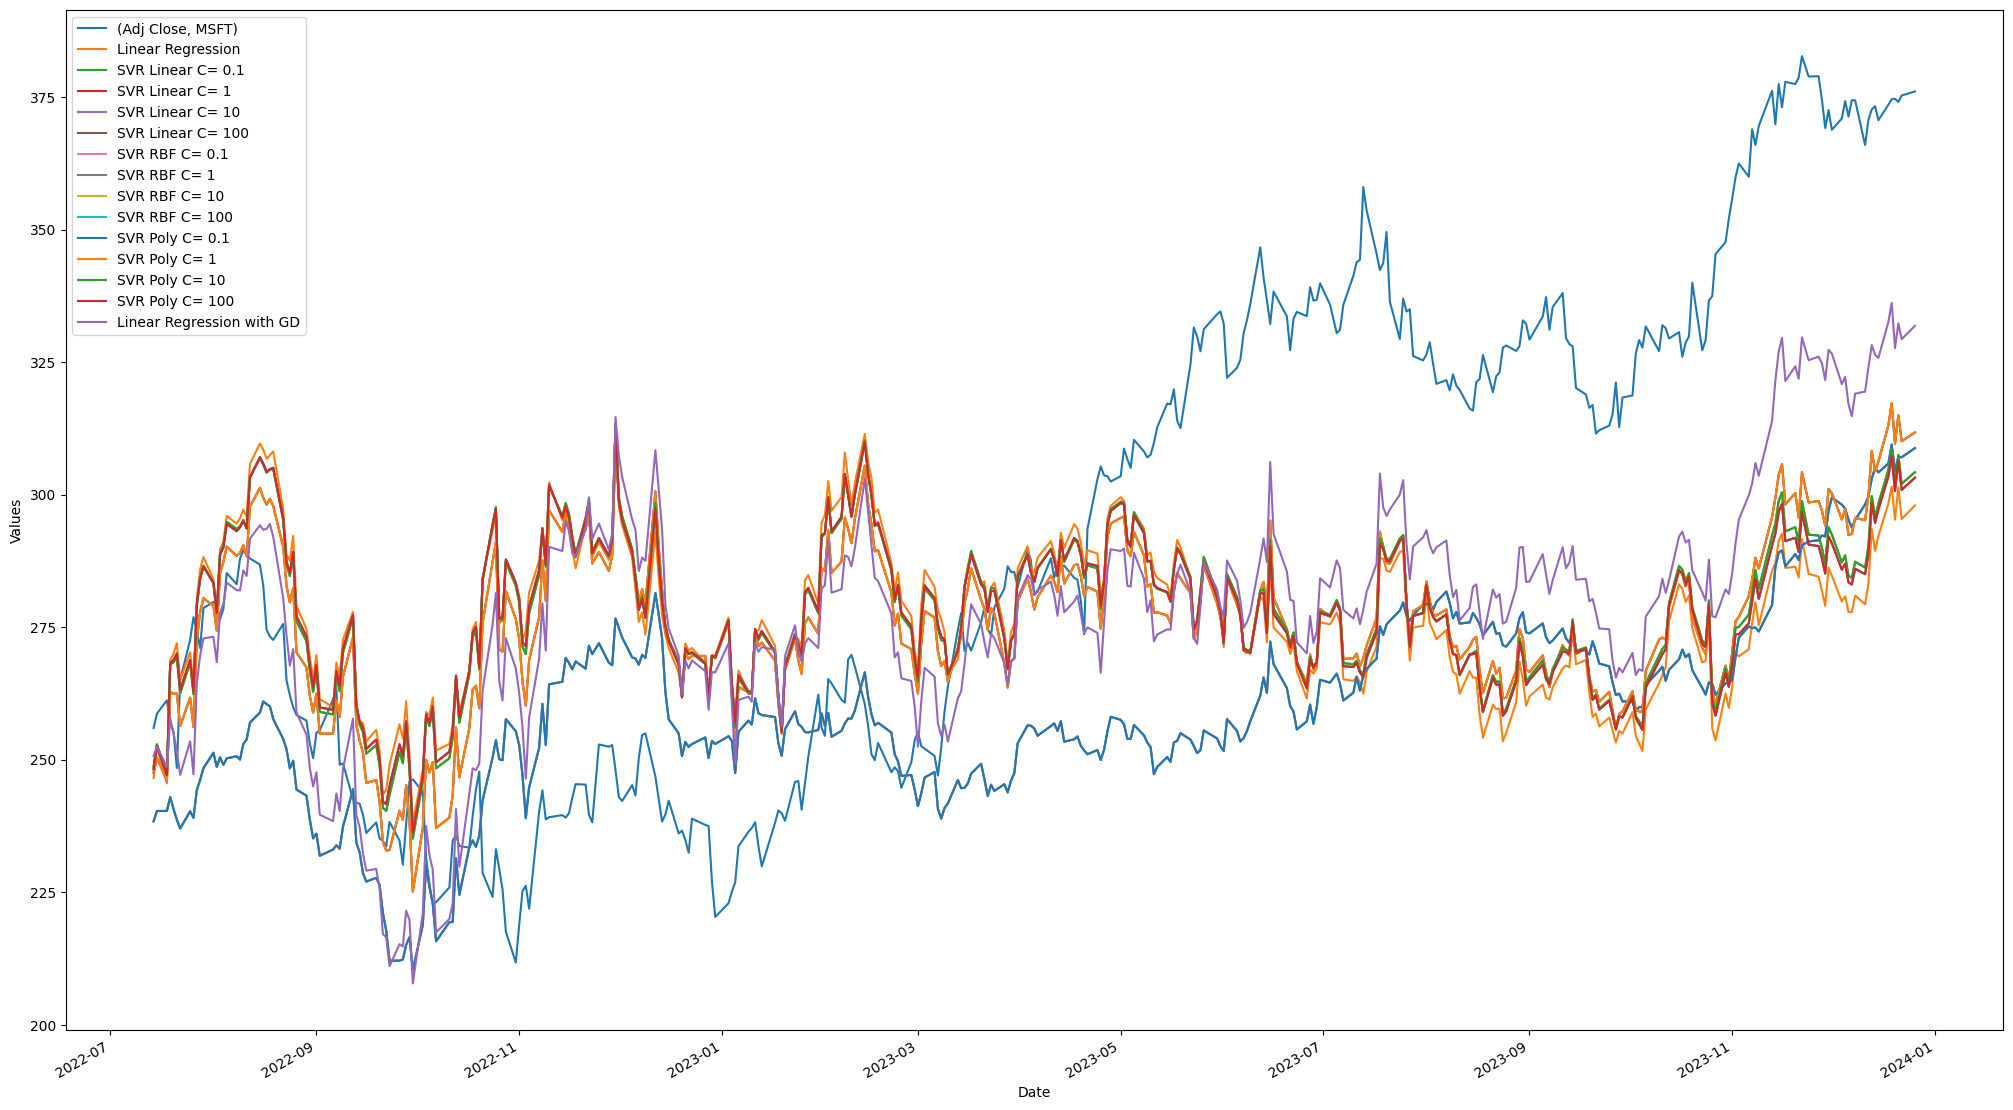



</details>

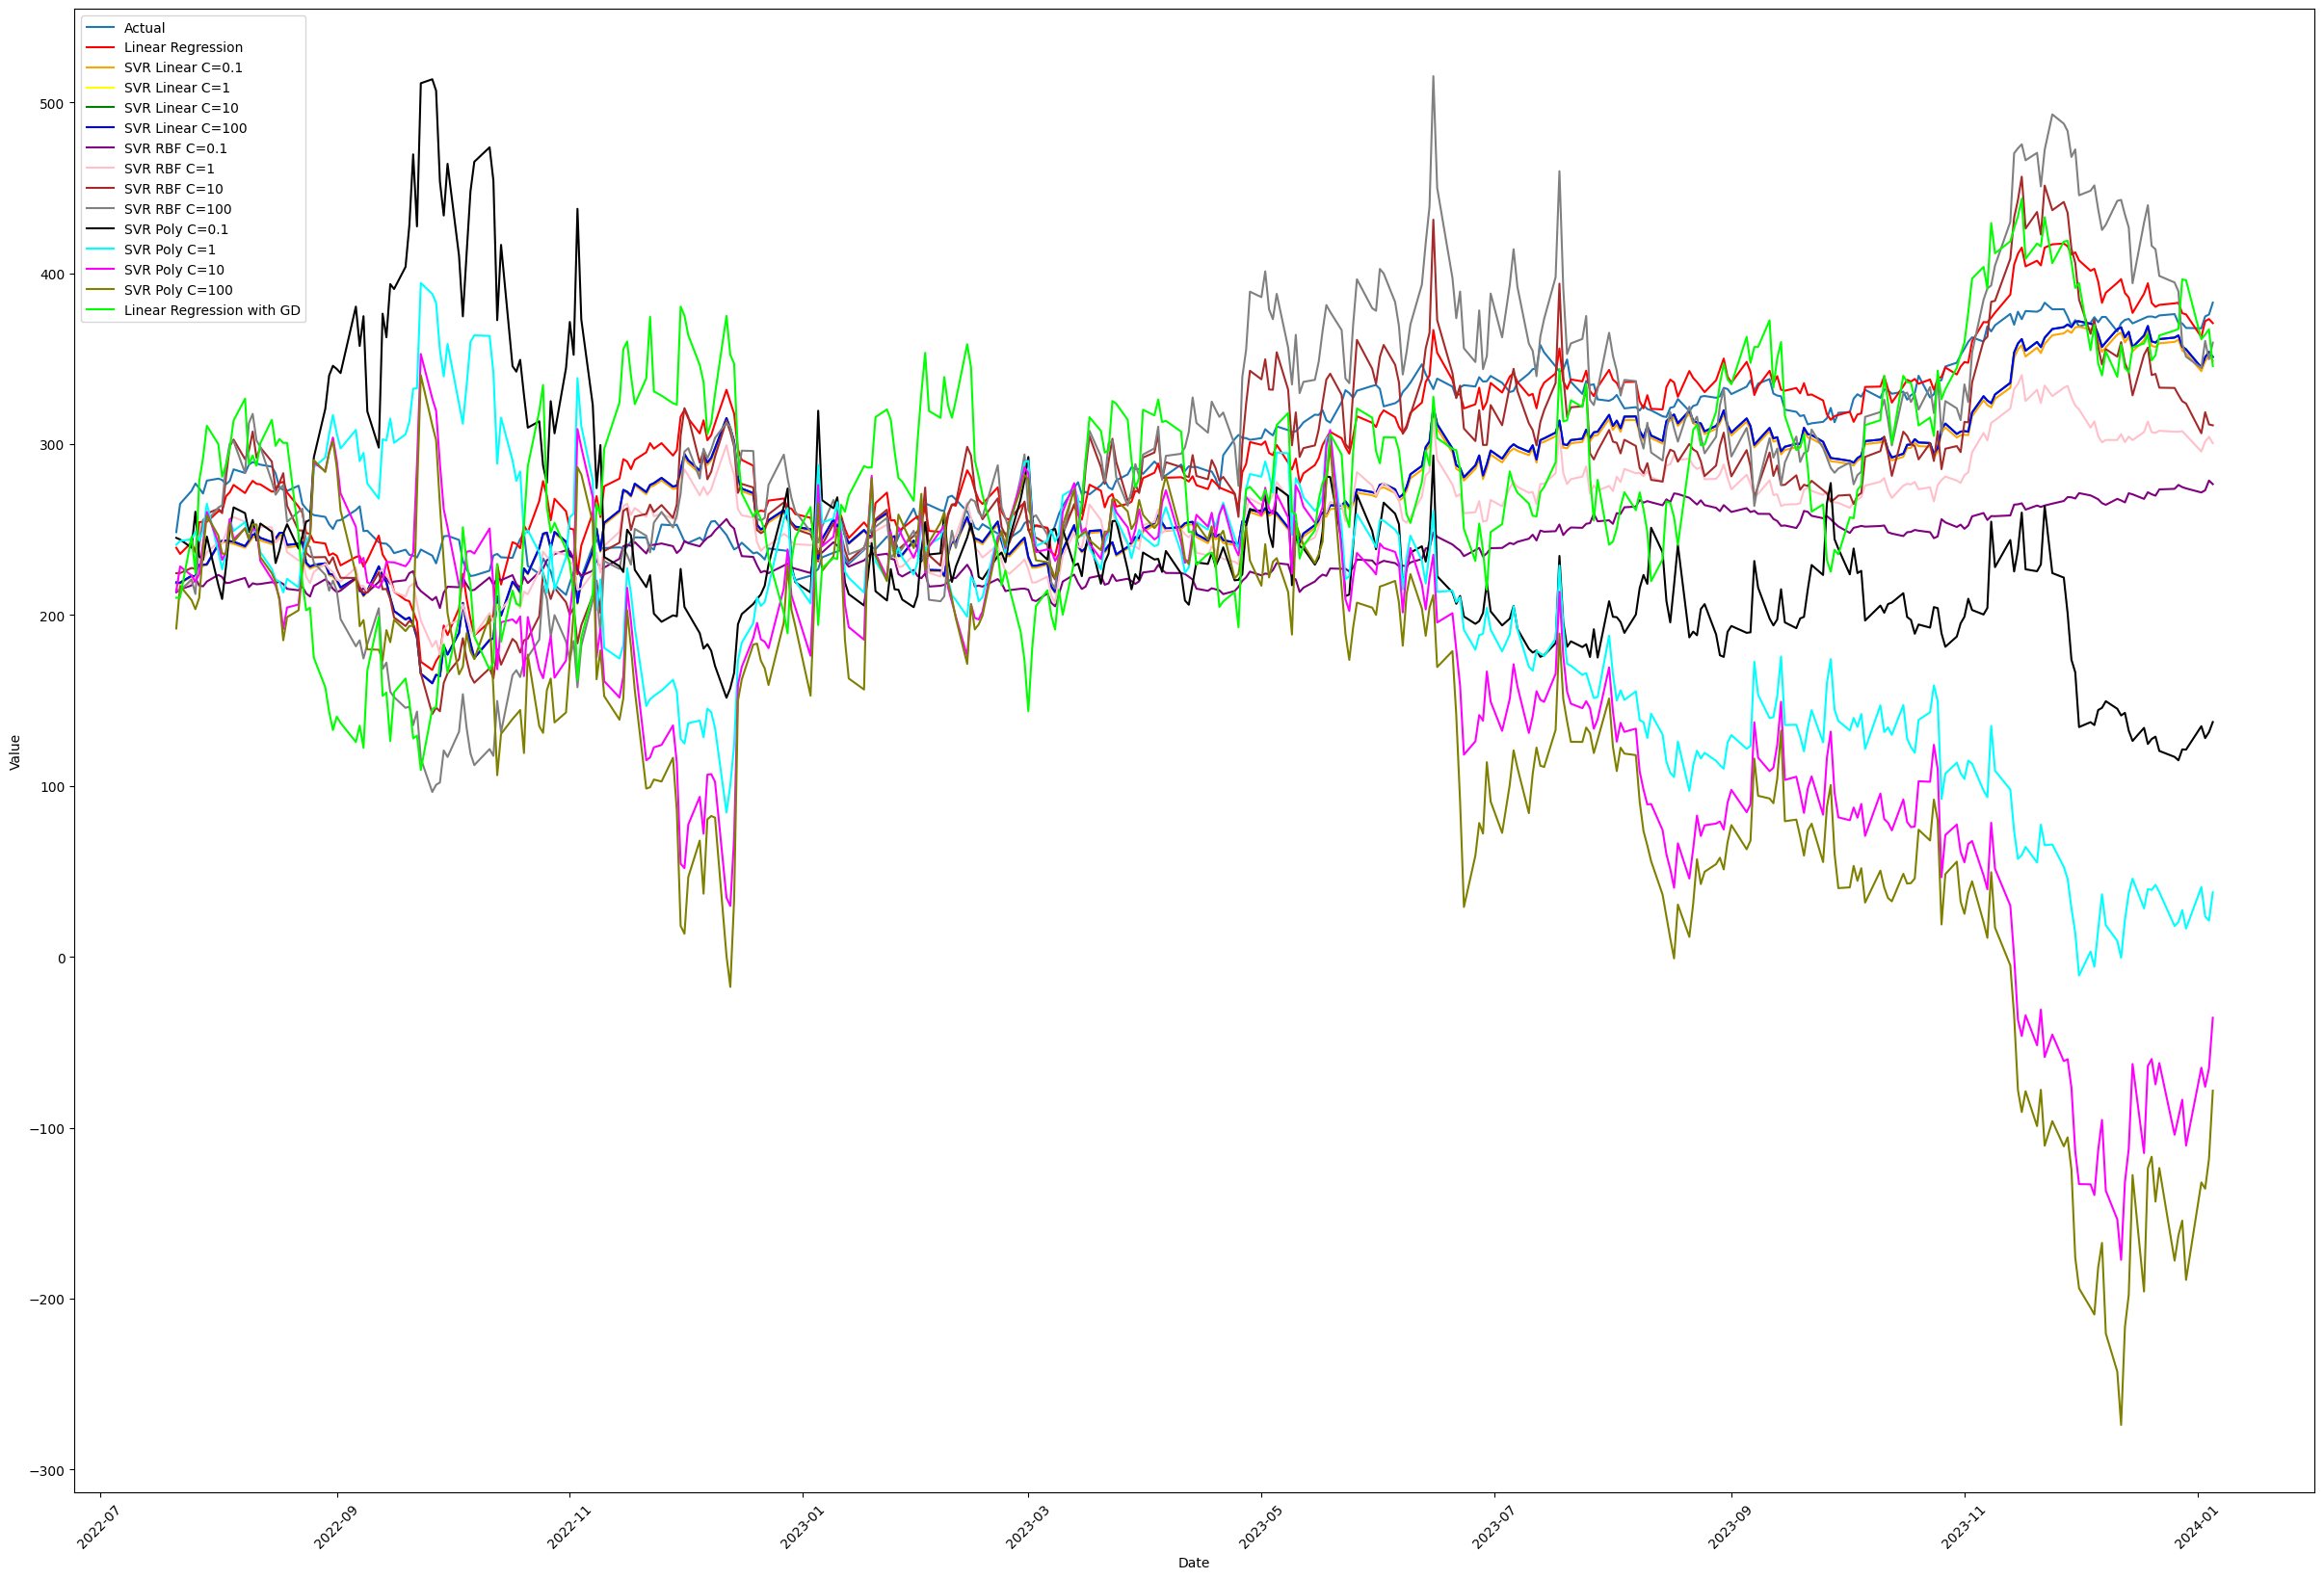

In [928]:
### START CODE HERE ###

# Create a figure and axis
fig, ax = plt.subplots(figsize=(30, 20))

# Plot the actual values
ax.plot(df_results['Date'], df_results['Actual'], label='Actual')

# Plot the predicted values for each model
ax.plot(df_results['Date'], df_results['Linear Regression Predictions'], label='Linear Regression', color='red')

ax.plot(df_results['Date'], df_results['SVR Linear C=0.1'], label='SVR Linear C=0.1', color='orange')
ax.plot(df_results['Date'], df_results['SVR Linear C=1'], label='SVR Linear C=1', color='yellow')
ax.plot(df_results['Date'], df_results['SVR Linear C=10'], label='SVR Linear C=10', color='green')
ax.plot(df_results['Date'], df_results['SVR Linear C=100'], label='SVR Linear C=100', color='blue')

ax.plot(df_results['Date'], df_results['SVR RBF C=0.1'], label='SVR RBF C=0.1', color='purple')
ax.plot(df_results['Date'], df_results['SVR RBF C=1'], label='SVR RBF C=1', color='pink')
ax.plot(df_results['Date'], df_results['SVR RBF C=10'], label='SVR RBF C=10', color='brown')
ax.plot(df_results['Date'], df_results['SVR RBF C=100'], label='SVR RBF C=100', color='gray')

ax.plot(df_results['Date'], df_results['SVR Poly C=0.1'], label='SVR Poly C=0.1', color='black')
ax.plot(df_results['Date'], df_results['SVR Poly C=1'], label='SVR Poly C=1', color='cyan')
ax.plot(df_results['Date'], df_results['SVR Poly C=10'], label='SVR Poly C=10', color='magenta')
ax.plot(df_results['Date'], df_results['SVR Poly C=100'], label='SVR Poly C=100', color='olive')

ax.plot(df_results['Date'], df_results['Linear Regression with GD'], label='Linear Regression with GD', color='lime')

# Set the x-axis label and rotate the tick labels
ax.set_xlabel('Date')
plt.xticks(rotation=45)

# Set the y-axis label
ax.set_ylabel('Value')

# Add a legend
ax.legend()

# Show the plot
plt.show()


### END CODE HERE ###

### Question
1. Rank Top 3 Models with Best prediction (Best MSE)
2. What would be the reason for large error from 2023-05 to 2024-01? 

1. Linear Regression, Linear Regression with gradient descent, SVR kernel=rbg C=100
2. ข้อมูลในช่วงนั้นเป็นช่วงที่เราเก็บไว้ test เนื่องจากเราใช้ช่วงก่อนหน้านำมา train ทำให้ช่วงแรกๆ โมเดลที่รู้จักข้อมูลที่ train ทำนายได้โอเค